In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_d = '/home/lucytian/group/data/ENCODE4/chrmbpnet/features'

In [3]:
df = pd.read_csv(f'{data_d}/baseline_annotation_chrmbpnet.1.txt.gz', sep='\t', compression='gzip')

In [4]:
lung_cols = [i for i in df.columns if 'lung' in i.lower() or 'LNG' in i]
binary = [i for i in df.columns if (i.startswith('cCREv4_Human_CellType')) | (i.startswith('GTEx_Flagship.GTEx_Finemap_PIP_'))]
binary_new = [i for i in binary if any(sub in i for sub in ['LIV', 'liver', 'BLD', 'blood', 'LNG', 'lung', 'K562', 'GM12878', 'KID', 'kidney', 'HepG2'])]
continuous_tracks = [i for i in lung_cols if i not in binary_new]

In [5]:
dfs = [df[['CHR', 'BP', 'SNP', 'CM', 'base'] + continuous_tracks]]
for i in np.arange(2, 23):
    df = pd.read_csv(f'{data_d}/baseline_annotation_chrmbpnet.{i}.txt.gz', sep='\t', compression='gzip')
    df = df[['CHR', 'BP', 'SNP', 'CM', 'base'] + continuous_tracks]
    dfs.append(df)

In [6]:
df_all = pd.concat(dfs)
dfs=0

In [7]:
colors = [
    'black',        # ABC_ENCODE_E2G_2022.ABC_DNaseH3K27ac_LNG
    'grey',         # ADASTRA2021_BillCipher.ADASTRA_UseAvgOnNonTested_lung
    "#008181",      # Enformer.Enformer_lung_all
    "#4783b6",      # Enformer.Enformer_lung_H3K4me3
    "#278c44",      # Enformer.Enformer_lung_DNASE
    "#008c8c",      # Enformer.Enformer_lung_CAGE
    "#43a0c8",      # Enformer.Enformer_lung_CHIP
    "#654420",      # Vierstra2023.rsids_FDR20_Lung
    "#b56728",      # Vierstra2023.rsids_Nominal_Lung
    "#ec2c91",      # dnase.lung.abs_logfc_x_max_percentile
    "#f8b4bf",      # dnase.lung.jsd_x_max_percentile
    "#bb1c82",      # dnase.lung.abs_logfc_x_jsd_x_max_percentile
]

In [8]:
track_color_dict = dict(zip(continuous_tracks, colors))
snps = ['rs1435867', 'rs11678190', 'rs8040015']
tracks = ['Enformer.Enformer_lung_DNASE', 'Enformer.Enformer_lung_CAGE', 'Enformer.Enformer_lung_CHIP']

In [9]:
df_all = df_all.reset_index()

In [10]:
snp_index=df_all[df_all['SNP'] == snps[1]].index[0]
snp_value = df_all.loc[snp_index, tracks[1]]

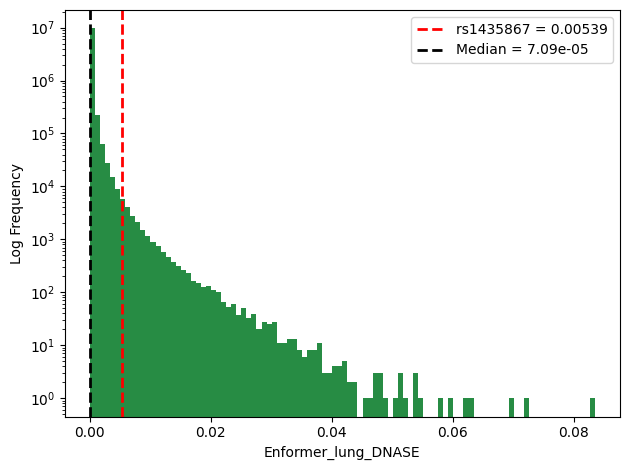

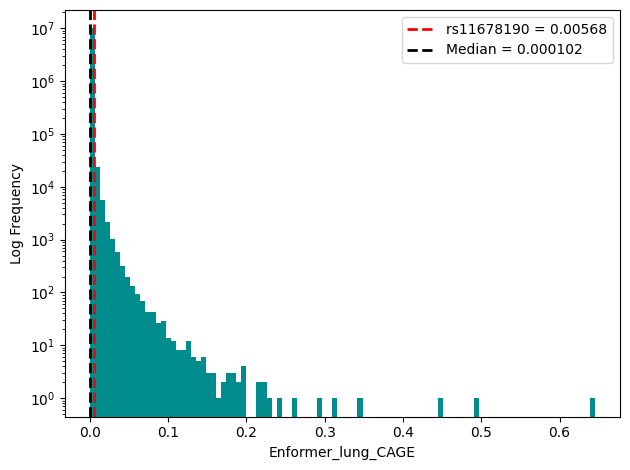

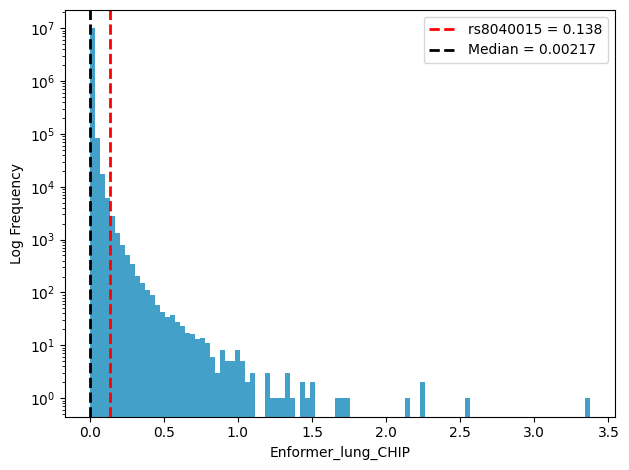

In [11]:
for i in np.arange(3):
    snp_index=df_all[df_all['SNP'] == snps[i]].index[0]
    snp_value = df_all.loc[snp_index, tracks[i]]
    plt.hist(df_all[tracks[i]], bins=100, color=track_color_dict[tracks[i]])
    median_value = df_all[tracks[i]].median()
    plt.yscale('log')
    plt.axvline(snp_value, color='red', linestyle='--', linewidth=2, label=f"{snps[i]} = {snp_value:.3g}")
    plt.axvline(median_value, color='black', linestyle='--', linewidth=2, label=f"Median = {median_value:.3g}")
    #plt.title(f"Histogram of {tracks[i]} (log scale)")
    #plt.title(f"Histogram of {tracks[i].split('.')[-1]} (log scale)")
    plt.xlabel(tracks[i].split('.')[-1])
    plt.ylabel("Log Frequency")
    plt.tight_layout()
    plt.legend()
    plt.show()